In [1]:
from lensid.utils.ml_utils import *

In [3]:
indir = 'test'

In [4]:
tag='_kaggle'
df_sky = pd.read_csv('../../data/dataframes/'+str(indir)+'/ML_sky.csv').drop(columns=['Unnamed: 0'])
df_qts = pd.read_csv('../../data/dataframes/'+str(indir)+'/ML_qts'+tag+'.csv').drop(columns=['Unnamed: 0'])

In [5]:
df_test=pd.merge(df_sky, df_qts, on=['img_0', 'img_1','Lensing','m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2'])
df_test['densnet_xgbsky_bayestar_mul_0'] = df_test['xgb_dense_QTS_0']*df_test['xgb_pred_bayestar_skymaps']
#df_test['densnet_xgbsky_pe_mul'] = df_test['xgb_dense_QTS']*df_test['xgb_pred_pe_skymaps']
df_test.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,xgb_dense_QTS_4,xgb_dense_QTS_5,xgb_dense_QTS_6,xgb_dense_QTS_7,xgb_dense_QTS_8,xgb_dense_QTS_9,xgb_dense_QTS_10,xgb_dense_QTS_0_fpp,"m1, m2_fpp",densnet_xgbsky_bayestar_mul_0
499787,573931000.000000000-147862,576295500.000000000-152591,0,0.624086,5.031932e-03,7.194767e-03,0.068212,0.005565,0.018160,0.000484,...,0.012844,0.017992,0.022183,0.016162,0.008589,0.044153,0.026009,0.166808,0.161306,3.178280e-06
499788,613877500.000000000-227755,509764000.000000000-19528,0,0.385130,3.105258e-03,4.166006e-02,0.151082,0.142493,0.367799,0.430695,...,0.002088,0.001780,0.002149,0.003790,0.001362,0.002971,0.003003,0.393461,0.503957,2.244034e-08
499789,508826000.000000000-17652,574919000.000000000-149838,0,0.000001,8.818891e-09,2.793398e-07,0.126756,0.006108,0.021183,0.294046,...,0.015637,0.021222,0.007163,0.012635,0.018159,0.014640,0.013922,0.214177,0.600374,5.788652e-08
499790,659717500.000000000-319435,633941500.000000000-267883,0,0.025394,2.047490e-04,1.369400e-02,0.164330,0.000000,0.000000,0.000000,...,0.003140,0.009145,0.004471,0.007767,0.002544,0.002581,0.011669,0.230602,0.975932,5.425971e-08
499791,684155000.000000000-368310,652098000.000000000-304196,0,0.075229,6.065606e-04,1.718762e-02,0.129732,0.291756,0.573907,1.604047,...,0.000548,0.000515,0.000952,0.000605,0.000980,0.004706,0.000414,0.641832,0.503765,2.803847e-09


In [6]:
df_test.columns

Index(['img_0', 'img_1', 'Lensing', 'bayestar_skymaps_blu',
       'bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'dense_H1_0', 'mean_overlap_qts_H1', 'std_overlap_qts_H1',
       'lsq_overlap_qts_H1', 'dense_L1_0', 'mean_overlap_qts_L1',
       'std_overlap_qts_L1', 'lsq_overlap_qts_L1', 'dense_V1_0',
       'mean_overlap_qts_V1', 'std_overlap_qts_V1', 'lsq_overl

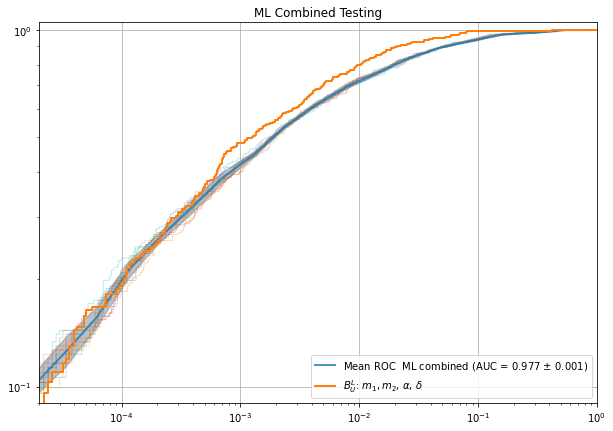

In [7]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,7)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()

for i in range(1,11):
    df_test['densnet_xgbsky_bayestar_mul_'+str(i)] = df_test['xgb_dense_QTS_'+str(i)]*df_test['xgb_pred_bayestar_skymaps_'+str(i)]

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test.Lensing.values, df_test['densnet_xgbsky_bayestar_mul_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC  ML combined (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['m1, m2, ra, sin_dec']
labels=[r'$B^L_U$: $m_1,m_2$, $\alpha$, $\delta$']
for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test.Lensing.values, df_test[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=2)

ax.set(xlim=[2e-5,1],ylim=[9e-2,1.05],title = "ML Combined Testing",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
plt.savefig('plots/ROC-log-combined'+tag+'.png')

plt.show()


In [8]:
df_test.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_1,densnet_xgbsky_bayestar_mul_2,densnet_xgbsky_bayestar_mul_3,densnet_xgbsky_bayestar_mul_4,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10
499787,573931000.000000000-147862,576295500.000000000-152591,0,0.624086,5.031932e-03,7.194767e-03,0.068212,0.005565,0.018160,0.000484,...,4.275566e-06,2.594134e-06,3.519422e-06,1.084050e-06,1.684903e-06,3.127659e-06,1.893892e-06,7.014475e-07,4.887099e-06,2.876674e-06
499788,613877500.000000000-227755,509764000.000000000-19528,0,0.385130,3.105258e-03,4.166006e-02,0.151082,0.142493,0.367799,0.430695,...,1.707332e-08,2.749966e-08,2.305421e-08,1.682402e-08,1.300539e-08,1.360167e-08,3.337633e-08,1.090406e-08,1.722726e-08,1.959637e-08
499789,508826000.000000000-17652,574919000.000000000-149838,0,0.000001,8.818891e-09,2.793398e-07,0.126756,0.006108,0.021183,0.294046,...,4.846907e-08,8.586866e-08,6.223430e-08,7.610616e-08,9.480010e-08,3.268833e-08,5.623249e-08,7.761049e-08,7.101666e-08,6.103954e-08
499790,659717500.000000000-319435,633941500.000000000-267883,0,0.025394,2.047490e-04,1.369400e-02,0.164330,0.000000,0.000000,0.000000,...,5.073550e-08,4.399752e-08,1.196818e-07,1.344342e-08,5.042218e-08,2.027796e-08,2.972551e-08,1.399207e-08,1.277307e-08,4.877021e-08
499791,684155000.000000000-368310,652098000.000000000-304196,0,0.075229,6.065606e-04,1.718762e-02,0.129732,0.291756,0.573907,1.604047,...,1.990583e-08,7.410953e-09,1.088632e-08,3.996961e-09,3.512291e-09,6.516750e-09,4.328287e-09,6.934624e-09,3.929372e-08,2.782117e-09


In [9]:
df_test.to_csv('../../data/dataframes/'+str(indir)+'/ML_combined'+tag+'.csv')

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


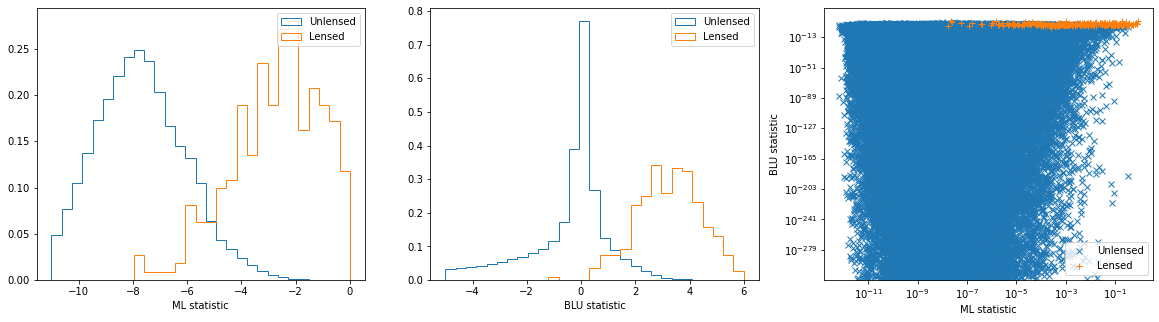

In [10]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-11,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-5,6,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()


/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


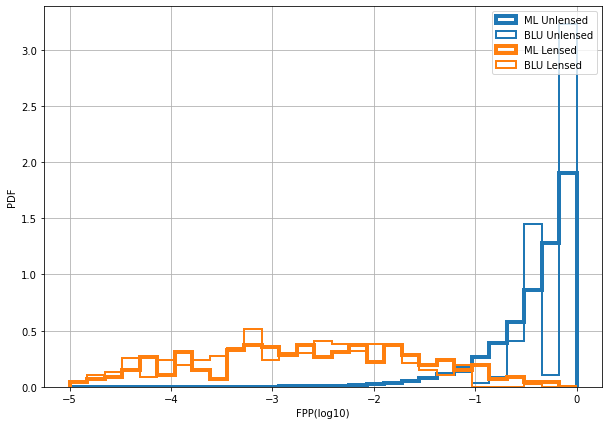

In [11]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML bayestar sky x ML QTs auc = 0.9774
$B^L_U$ auc = 0.9909


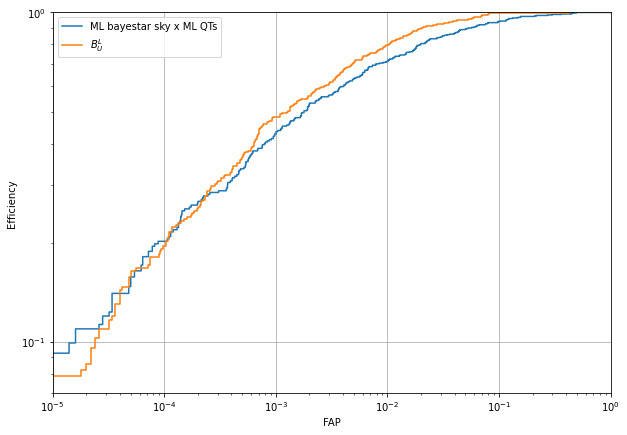

In [12]:
fig,rocs=plot_ROCs(df_test,cols=['densnet_xgbsky_bayestar_mul_0','m1, m2, ra, sin_dec'],labels =['ML bayestar sky x ML QTs','$B^L_U$'],logy=True,ylim=7e-2)

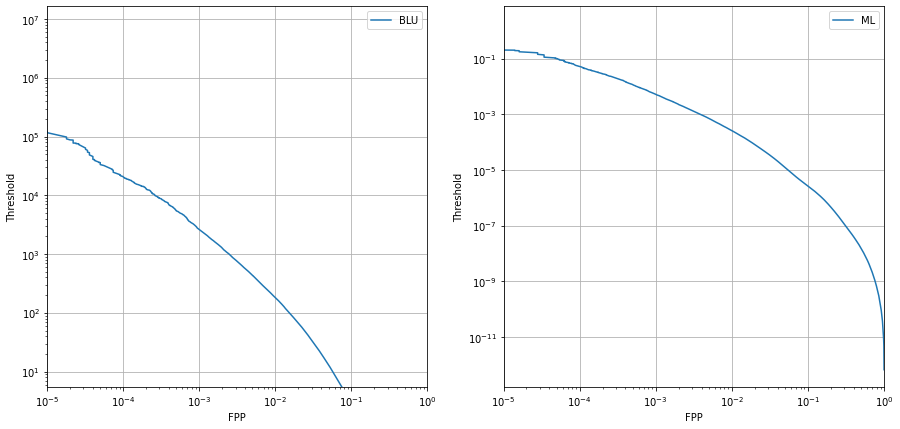

In [13]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [14]:
df_test.to_csv('../../data/dataframes/'+str(indir)+'/ML_combined'+tag+'.csv')